Лабораторная работа №4, Аскеров Руслан, НПИбд-01-17, Вариант 8

Breast Cancer Wisconsin (Diagnostic) Data Set  

Название файла: wdbc.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)  

Первый признак: perimeter (столбец No 5) 

Второй признак: area (столбец No 6) 

Класс: Outcome (столбец No 1) 

Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model 

Меры качества: F-мера, парные меры TP, FN, FP, TN, индекс Жаккара 

Найти лучший алгоритм кластеризации относительно меры качества: F-мера 

Задание:
1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.
2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными
метками класса. Если в признаках имеются пропущенные значения, то замените их на средние
значения для того класса, к которому относится запись с пропущенным значением.
3. Если количество различных меток класса больше семи, то объедините некоторые (наименее
многочисленные) классы, чтобы общее количество классов не превышало семь.
4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум
признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок,
создайте легенду набора данных.
5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в
индивидуальном задании, для случая, когда количество кластеров равно количеству классов в
исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените
аргументы по умолчанию или используйте для кластеризации случайную выборку из набора
данных.
6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте
матрицу сопряженности и найдите значения мер качества кластеризации, указанные в
индивидуальном задании, не пользуясь функциями из библиотеки scikit-learn.
7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации,
указанной в индивидуальном задании.
8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте набор
данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая
точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора
данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1) Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, sep = ',', header=None, error_bad_lines=False, usecols=[1,5,6])
df.columns = ['Outcome','perimeter','area']

In [3]:
df

,Outcome,perimeter,area
0,M,1001.0,0.11840
1,M,1326.0,0.08474
2,M,1203.0,0.10960
3,M,386.1,0.14250
4,M,1297.0,0.10030
...,...,...,...
564,M,1479.0,0.11100
565,M,1261.0,0.09780
566,M,858.1,0.08455
567,M,1265.0,0.11780


2) Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными
метками класса. Если в признаках имеются пропущенные значения, то замените их на средние
значения для того класса, к которому относится запись с пропущенным значением.

In [15]:
df.replace('?',np.nan)
print('Число отсутствующих значений:')
for col in df.columns:
 print('\t%s: %d' % (col,df[col].isna().sum()))

Число отсутствующих значений:
	Outcome: 0
	perimeter: 0
	area: 0


3) Если количество различных меток класса больше семи, то объедините некоторые (наименее
многочисленные) классы, чтобы общее количество классов не превышало семь.

In [16]:
len(df['Outcome'].unique())

2

4) Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум
признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок,
создайте легенду набора данных.

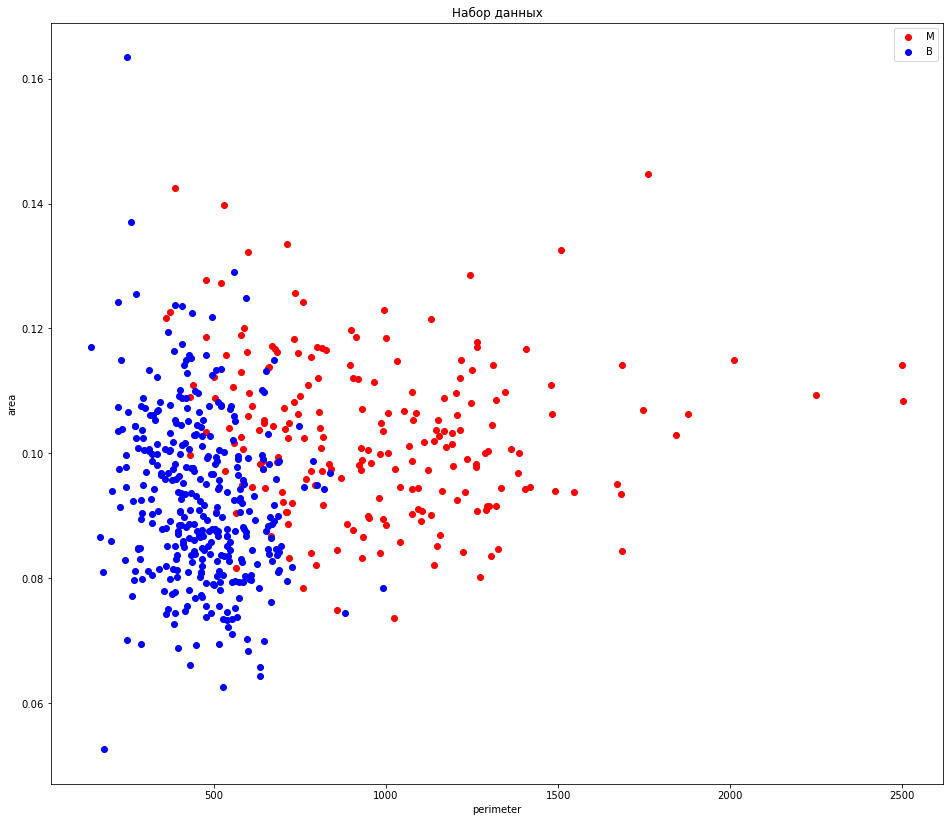

In [22]:
plt.figure(figsize=(16, 14))
plt.scatter(df['perimeter'][df['Outcome']=='M'], df['area'][df['Outcome']=='M'], c='r')
plt.scatter(df['perimeter'][df['Outcome']=='B'], df['area'][df['Outcome']=="B"], c='b')
plt.title('Набор данных')
plt.xlabel('perimeter')
plt.ylabel('area')
plt.legend(df['Outcome'].unique())
plt.show()

5) Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в
индивидуальном задании, для случая, когда количество кластеров равно количеству классов в
исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените
аргументы по умолчанию или используйте для кластеризации случайную выборку из набора
данных.

6) Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу
сопряженности и найдите значения мер качества кластеризации, указанные в индивидуальном
задании, не пользуясь функциями из библиотеки scikit-learn.

Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model

In [24]:
def plot_cluster(X,y):
    plt.figure(figsize=(16,14))
    clusters = np.unique(y)
    for cluster in clusters:
        row_ix = np.where(y == cluster)
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100)
    plt.grid(True)
    plt.show()
    
from sklearn.metrics.cluster import contingency_matrix

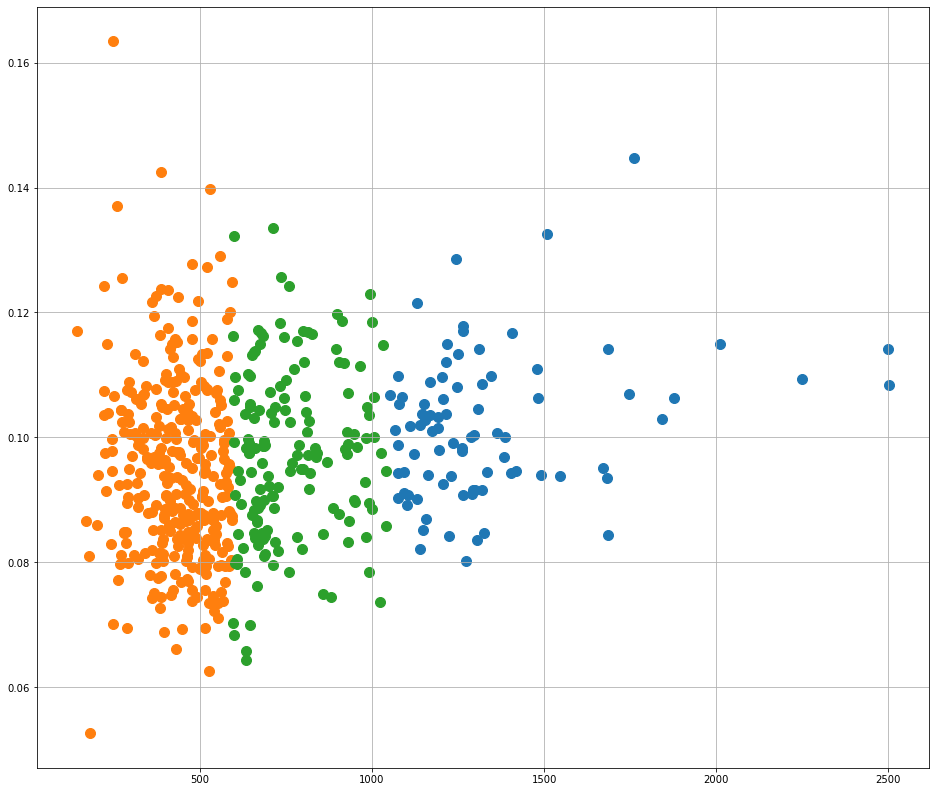

In [25]:
from sklearn.cluster import KMeans
x = np.array(df[['perimeter', 'area']])
y = np.array(df['Outcome'])
model = KMeans(n_clusters=3)
model.fit(x)
yhat = model.predict(x)
plot_cluster(x,yhat)

In [27]:
matrices = contingency_matrix(y, yhat)
print(np.unique(y), np.unique(yhat))

['B' 'M'] [0 1 2]


In [28]:
sum(matrices)

array([ 84, 330, 155])

In [30]:
import math

def pars(matrix, leng):
    nij2 = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            nij2 += matrix[i][j]*matrix[i][j]
    mj2 = 0
    for i in range(len(matrix)):
        mj2 += sum(matrix[i])*sum(matrix[i])
    ni2 = 0
    for i in range(len(matrix[0])):
        ni2 += matrix.sum(axis=0)[i]*matrix.sum(axis=0)[i]

    TP = (nij2 - leng)/2
    FN = (mj2 - nij2)/2
    FP = (ni2 - nij2)/2
    N = leng*(leng-1)/2
    TN = N - TP - FN - FP
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    Jaccard = TP / (TP + TN + FP)
    F = 2 * (precision * recall)/(precision + recall)

    print('ТР =', round(TP, 3))
    print('FN =', round(FN, 3))
    print('FР =', round(FP, 3))
    print('ТN =', round(TN, 3))
    print('Jaccard =', round(Jaccard, 3))
    print('F =', round(F, 3))
    
pars(matrices, sum(sum(matrices)))

ТР = 55750.0
FN = 30162.0
FР = 13956.0
ТN = 61728.0
Jaccard = 0.424
F = 0.716


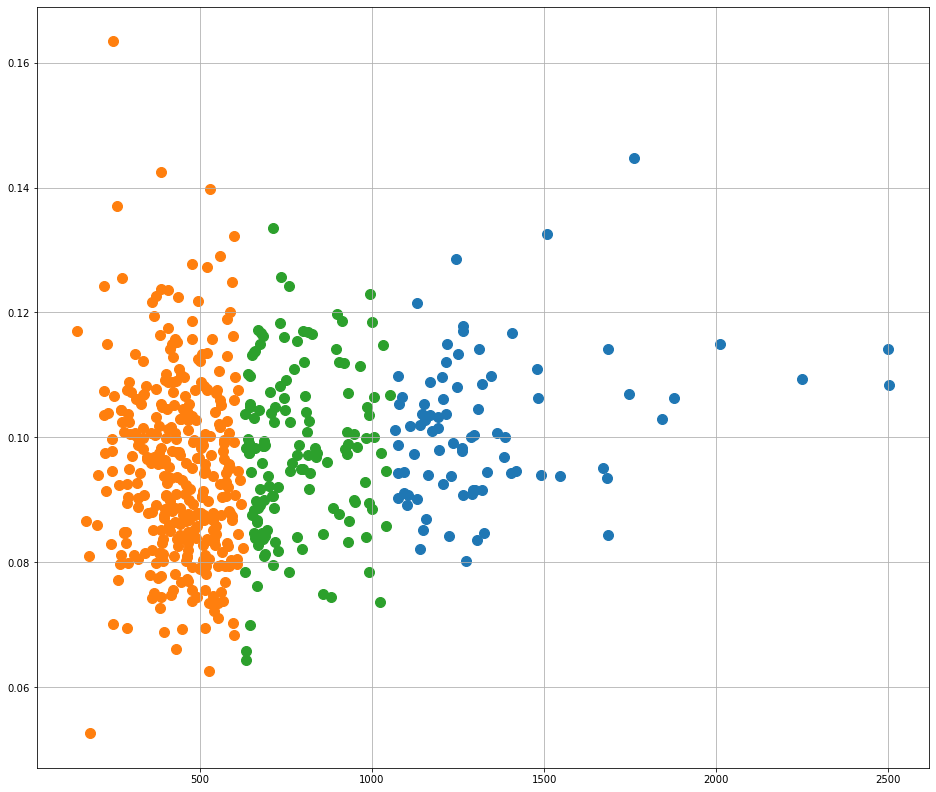

In [33]:
from sklearn.cluster import AgglomerativeClustering
xac = np.array(df[['perimeter', 'area']])
yac = np.array(df['Outcome'])
model = AgglomerativeClustering(n_clusters=3)
model.fit(xac)
yhatac = model.fit_predict(xac)
plot_cluster(xac,yhatac)

In [35]:
matrac = contingency_matrix(yac, yhatac)
print(np.unique(yac), np.unique(yhatac))

['B' 'M'] [0 1 2]


In [37]:
pars(matrac, sum(sum(matrac)))

ТР = 58203.0
FN = 27709.0
FР = 14822.0
ТN = 60862.0
Jaccard = 0.435
F = 0.732


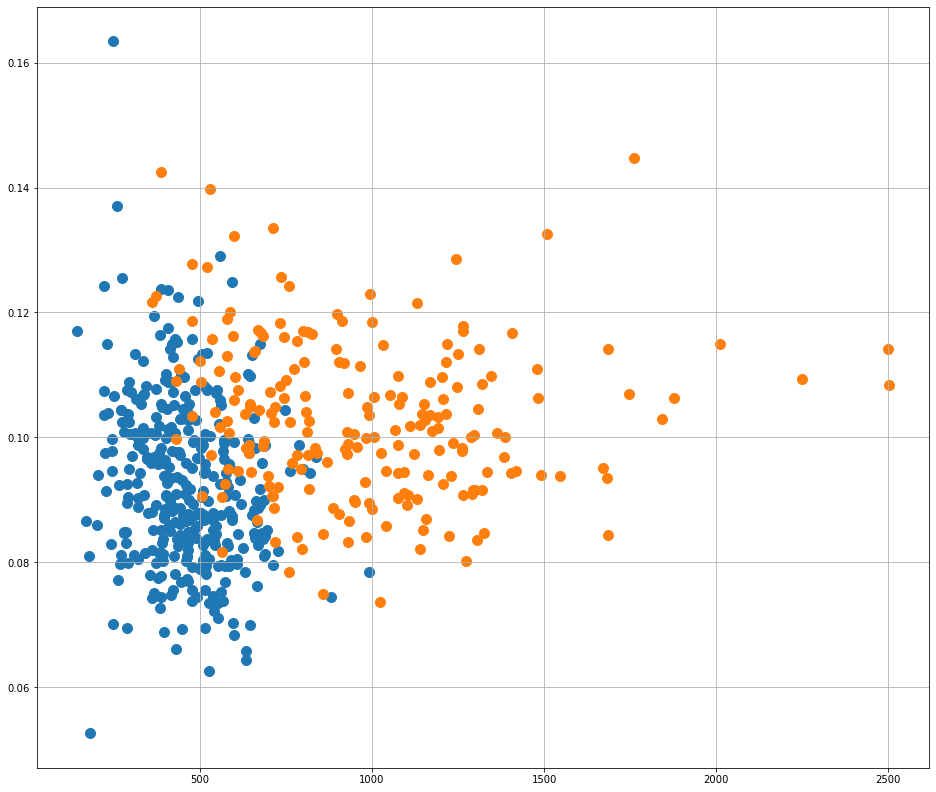

In [44]:
from sklearn.cluster import DBSCAN
# набор данных
xdbscan = np.array(df[['perimeter', 'area']])
ydbscan = np.array(df['Outcome'])
model = DBSCAN(eps=0.30, min_samples=9)
yhatdbscan = model.fit_predict(xdbscan)
plot_cluster(xdbscan,ydbscan)

In [40]:
matrdbscan = contingency_matrix(ydbscan, yhatdbscan)
print(np.unique(ydbscan), np.unique(yhatdbscan))

['B' 'M'] [-1]


In [45]:
pars(matrdbscan, sum(sum(matrdbscan)))

ТР = 85912.0
FN = 0.0
FР = 75684.0
ТN = 0.0
Jaccard = 0.532
F = 0.694


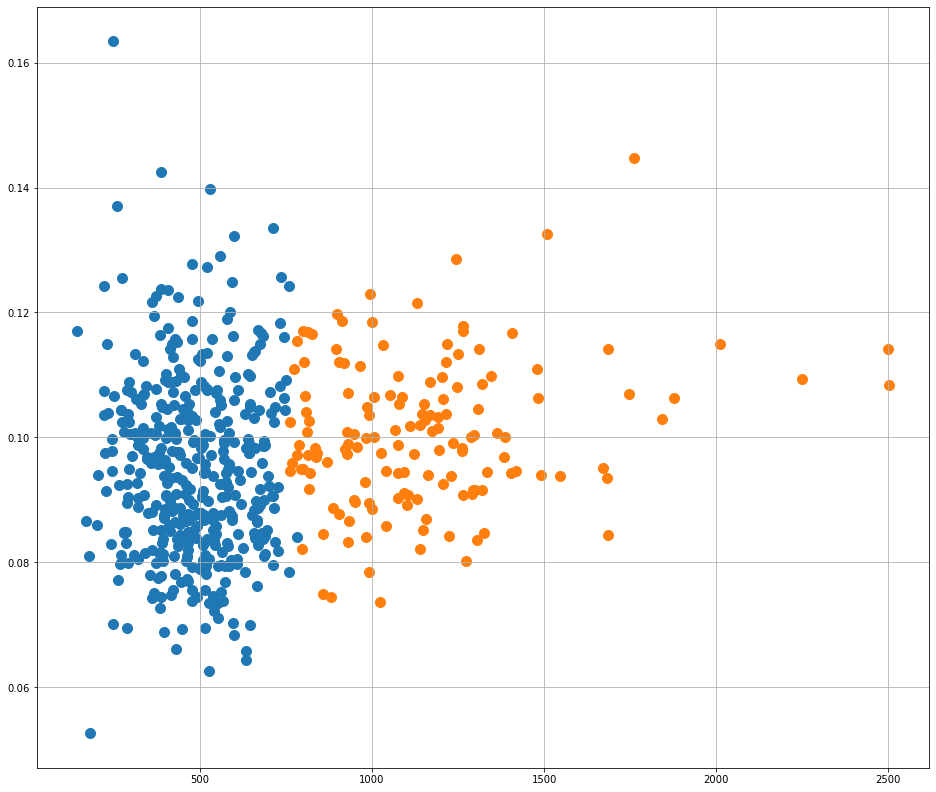

In [46]:
from sklearn.mixture import GaussianMixture
xgaus = np.array(df[['perimeter', 'area']])
ygaus = np.array(df['Outcome'])
model = GaussianMixture(n_components=2)
model.fit(xgaus)
yhatgaus = model.predict(xgaus)
plot_cluster(xgaus,yhatgaus)

In [47]:
matrgaus = contingency_matrix(ygaus, yhatgaus)
print(np.unique(ygaus), np.unique(yhatgaus))

['B' 'M'] [0 1]


In [48]:
pars(matrgaus, sum(sum(matrgaus)))

ТР = 73451.0
FN = 12461.0
FР = 25837.0
ТN = 49847.0
Jaccard = 0.493
F = 0.793


7) Определите алгоритм кластеризации, оптимальный с точки зрения меры
качества кластеризации, указанной в индивидуальном задании.

DBSCAN так как при нем F = 0.694

8) Для оптимального алгоритма кластеризации из предыдущего пункта
визуализируйте набор данных в виде точек плоскости с координатами,
соответствующими двум признакам, отображая точки различных кластеров
разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

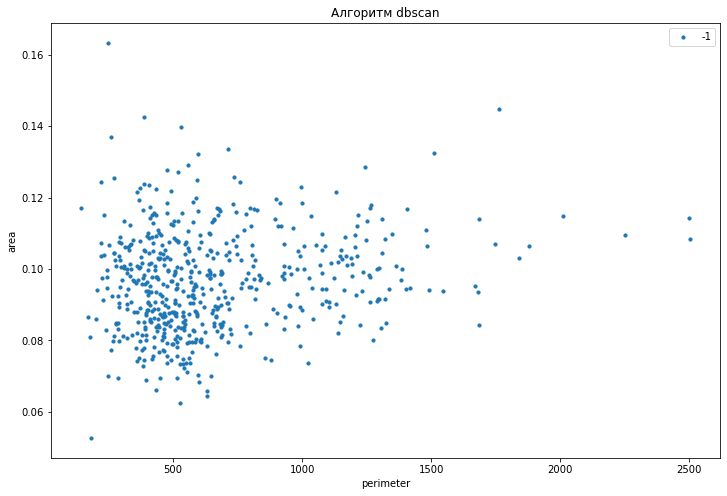

In [51]:
xdbscan = np.array(df[['perimeter', 'area']])
model = DBSCAN(eps=0.30, min_samples=9)
model.fit(xdbscan)
yhatdbscan = model.fit_predict(xdbscan)
plt.figure(figsize=(12,8))
row_ix0 = np.where(yhatdbscan == np.unique(yhatdbscan)[0])
plt.scatter(xdbscan[row_ix0, 0], xdbscan[row_ix0, 1], s = 10)
plt.title('Алгоритм dbscan')
plt.xlabel('perimeter')
plt.ylabel('area')
plt.legend(np.unique(yhatdbscan))
plt.show()
